In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing dataset
Since data is in form of excel file we have to use pandas read_excel to load the data

After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row

Check whether any null values are there or not. if it is present then following can be done,

(1).Imputing data using Imputation method in sklearn

(2).Filling NaN values with mean, median and mode using fillna() method

Describe data --> which can give statistical analysis

In [3]:
sdata=pd.read_csv("../data/dataset_small.csv")

In [4]:
import os
os.getcwd()

'd:\\DataScience\\Projects\\phishing_classifier\\phising_domain_detector\\research'

In [5]:
sdata

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,1,2,1,389,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,1,0,0,5,0,1,0,0,0,0,...,1,2,2,563,0,0,0,0,0,1
58641,2,0,0,0,0,0,0,0,0,0,...,1,4,0,122,1,0,0,0,0,0
58642,5,6,3,6,0,2,1,1,0,0,...,1,2,1,1122,0,0,0,0,0,1
58643,2,0,0,0,0,0,0,0,0,0,...,5,2,5,299,1,1,0,0,0,0


In [6]:
sdata.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,...,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,2.284338,0.457123,0.171285,1.937522,0.014102,0.311177,0.033456,0.212959,0.004451,0.001535,...,1.110666,2.829619,1.630113,5056.676272,0.501373,0.303419,0.001279,0.002234,0.008287,0.522585
std,1.473209,1.339340,0.801919,2.037525,0.138156,1.159198,0.343272,1.130323,0.107352,0.089320,...,0.912962,1.377018,1.719554,7102.853538,0.500002,0.815315,0.037599,0.047927,0.090657,0.499494
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,1191.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,9866.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,16.000000,20.000000,86400.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
for i in sdata:
    print(f"{i} has {sdata[i].unique().sum()} values")

qty_dot_url has 279 values
qty_hyphen_url has 456 values
qty_underline_url has 231 values
qty_slash_url has 326 values
qty_questionmark_url has 22 values
qty_equal_url has 196 values
qty_at_url has 141 values
qty_and_url has 220 values
qty_exclamation_url has 48 values
qty_space_url has 32 values
qty_tilde_url has 15 values
qty_comma_url has 33 values
qty_plus_url has 56 values
qty_asterisk_url has 223 values
qty_hashtag_url has 35 values
qty_dollar_url has 48 values
qty_percent_url has 1882 values
qty_tld_url has 43 values
length_url has 126425 values
qty_dot_domain has 177 values
qty_hyphen_domain has 66 values
qty_underline_domain has 3 values
qty_slash_domain has 0 values
qty_questionmark_domain has 0 values
qty_equal_domain has 0 values
qty_at_domain has 1 values
qty_and_domain has 0 values
qty_exclamation_domain has 0 values
qty_space_domain has 0 values
qty_tilde_domain has 0 values
qty_comma_domain has 0 values
qty_plus_domain has 0 values
qty_asterisk_domain has 0 values
qty_h

In [8]:
sdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 50.1 MB


In [9]:
sdata.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [10]:
sdata.dtypes

qty_dot_url             int64
qty_hyphen_url          int64
qty_underline_url       int64
qty_slash_url           int64
qty_questionmark_url    int64
                        ...  
qty_redirects           int64
url_google_index        int64
domain_google_index     int64
url_shortened           int64
phishing                int64
Length: 112, dtype: object

In [11]:
sdata.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,1,2,1,389,1,1,0,0,0,1


## Visualizing

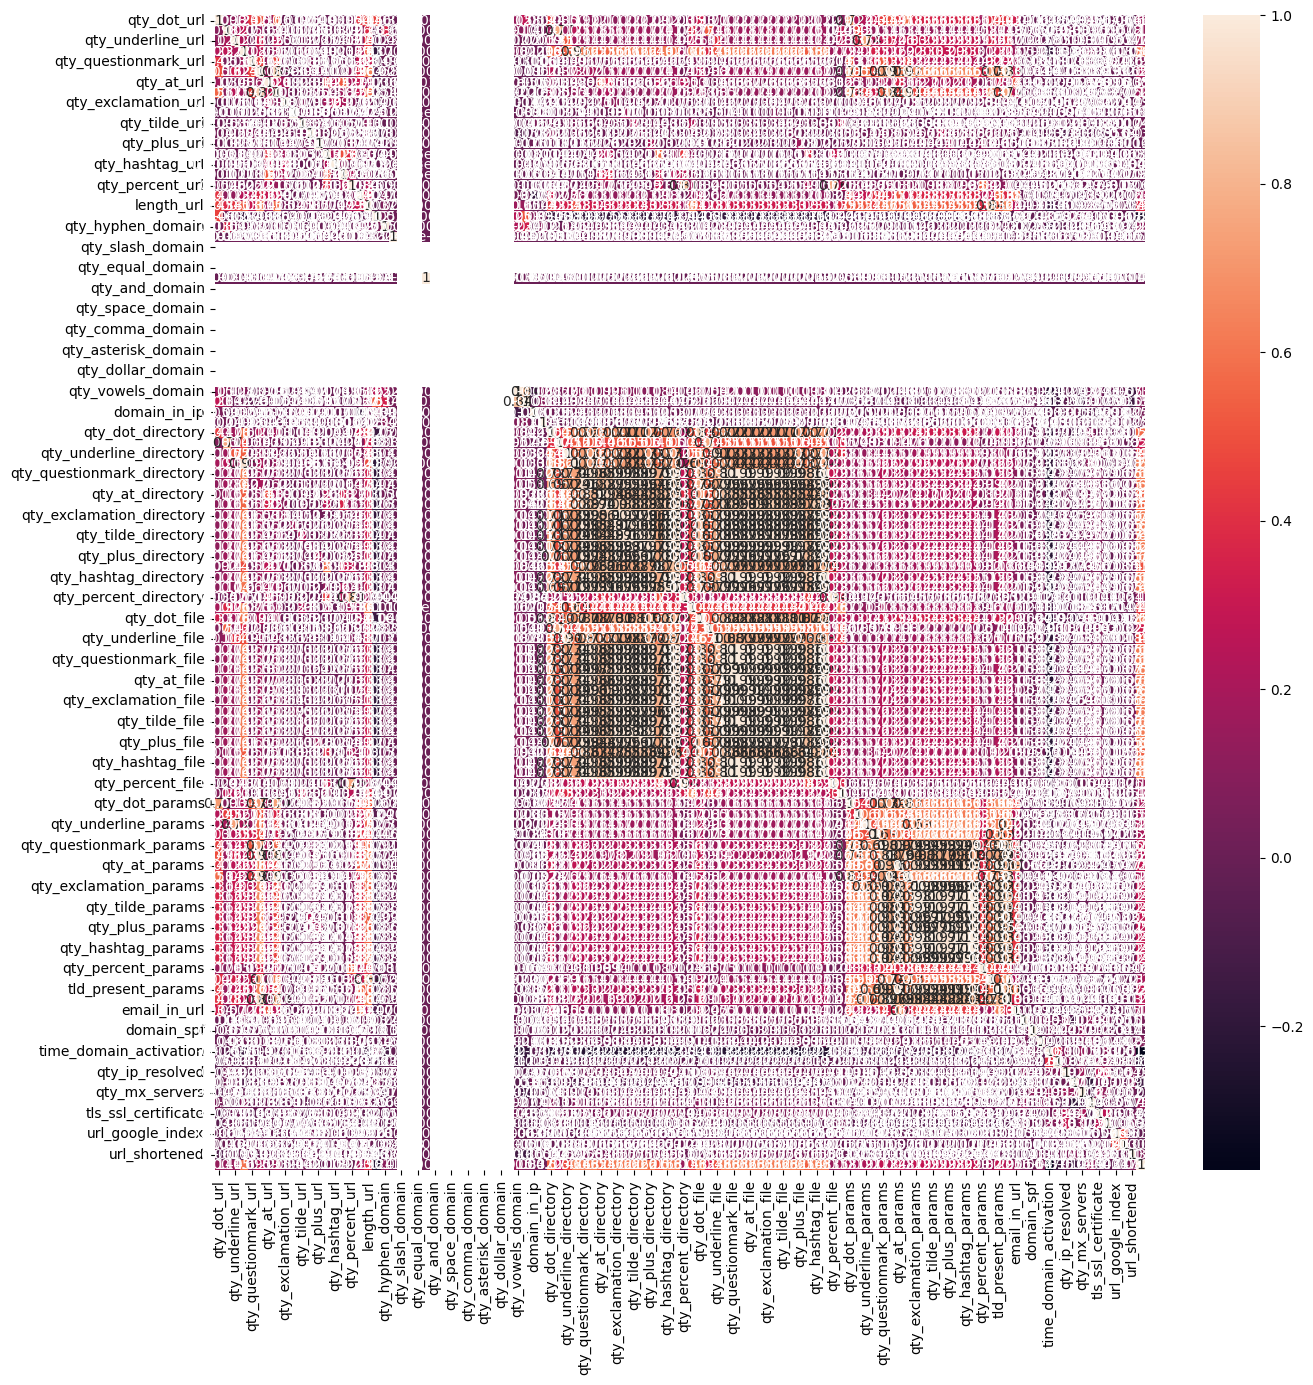

In [12]:
#Correlation heatmap

plt.figure(figsize=(15,15))
sns.heatmap(sdata.corr(), annot=True)
plt.show()

In [13]:
columnlist = []
for i in sdata.columns:
    columnlist.append(i)
    

In [14]:
# #pairplot for particular features

# df = sdata[columnlist]
# sns.pairplot(data = df,hue="class",corner=True);

In [15]:
sdata.describe().T

,count,mean,std,min,25%,50%,75%,max
qty_dot_url,58645.0,2.284338,1.473209,1.0,2.0,2.0,3.0,24.0
qty_hyphen_url,58645.0,0.457123,1.339340,0.0,0.0,0.0,0.0,35.0
qty_underline_url,58645.0,0.171285,0.801919,0.0,0.0,0.0,0.0,21.0
qty_slash_url,58645.0,1.937522,2.037525,0.0,0.0,1.0,3.0,44.0
qty_questionmark_url,58645.0,0.014102,0.138156,0.0,0.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...
qty_redirects,58645.0,0.303419,0.815315,-1.0,0.0,0.0,1.0,17.0
url_google_index,58645.0,0.001279,0.037599,-1.0,0.0,0.0,0.0,1.0
domain_google_index,58645.0,0.002234,0.047927,-1.0,0.0,0.0,0.0,1.0
url_shortened,58645.0,0.008287,0.090657,0.0,0.0,0.0,0.0,1.0


In [16]:
columnlist[0:5]

['qty_dot_url',
 'qty_hyphen_url',
 'qty_underline_url',
 'qty_slash_url',
 'qty_questionmark_url']

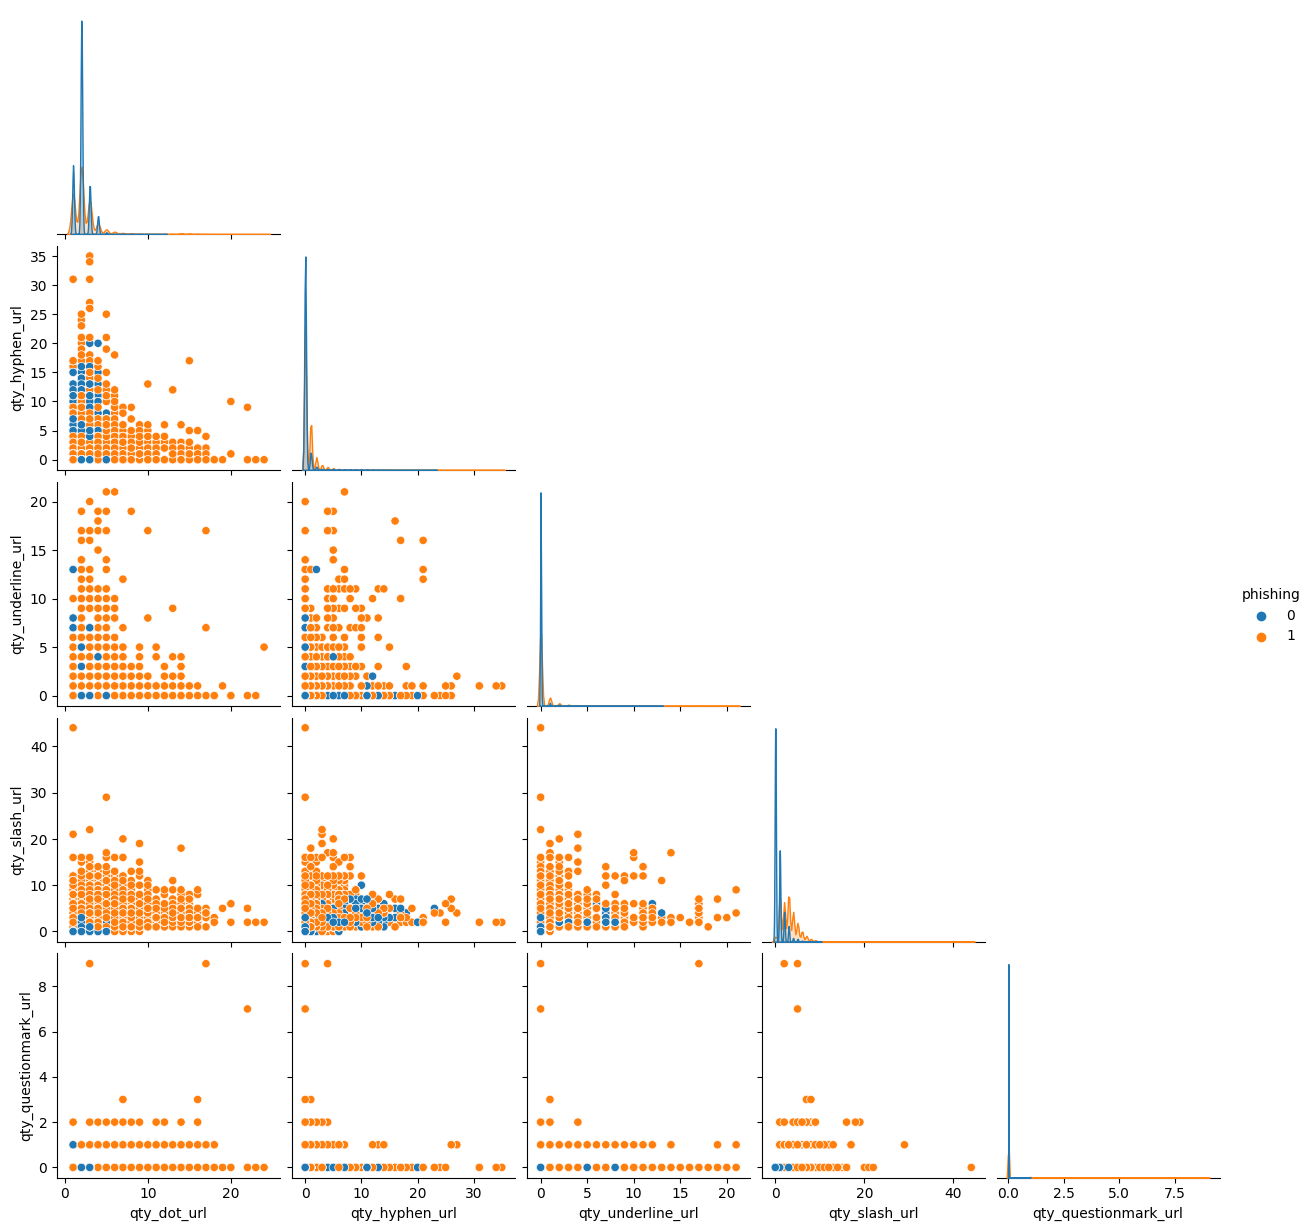

In [17]:
df = sdata[['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'phishing']]
sns.pairplot(data = df,hue="phishing",corner=True);

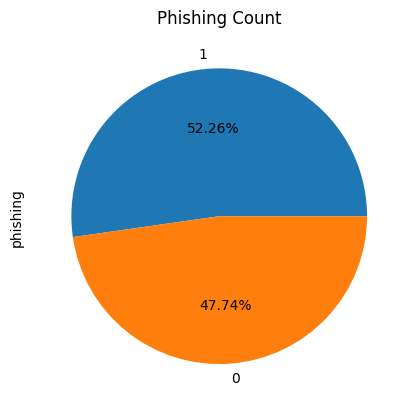

In [18]:
# Phishing Count in pie chart

sdata['phishing'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()


## Splitting the Data

In [19]:
# Splitting the dataset into dependant and independant fetature

X = sdata.drop(["phishing"],axis =1)
y = sdata["phishing"]

In [20]:
X.shape

(58645, 111)

In [21]:
y.shape

(58645,)

In [22]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 121)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((46916, 111), (46916,), (11729, 111), (11729,))

## Model Building & Training:

In [23]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

## XGB Classifiers

In [24]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# fit the model 
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy=None, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=0, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, ...)

In [25]:
#predicting the target value from the model for the samples
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

In [26]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_xgb = metrics.accuracy_score(y_train,y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test,y_test_xgb)
print("XGBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train,y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test,y_test_xgb)
print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train,y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test,y_test_xgb)
print("XGBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_train_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train,y_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_test,y_test_xgb)
print("XGBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : precision on test Data: {:.3f}".format(precision_score_train_xgb))

XGBoost Classifier : Accuracy on training Data: 0.976
XGBoost Classifier : Accuracy on test Data: 0.956

XGBoost Classifier : f1_score on training Data: 0.977
XGBoost Classifier : f1_score on test Data: 0.958

XGBoost Classifier : Recall on training Data: 0.976
XGBoost Classifier : Recall on test Data: 0.976

XGBoost Classifier : precision on training Data: 0.978
XGBoost Classifier : precision on test Data: 0.978


In [27]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('XGBoost Classifier',acc_test_xgb,f1_score_test_xgb,
             recall_score_train_xgb,precision_score_train_xgb)

Training score:  0.9759570295847898
Mean cross-validation score: 0.96
K-fold CV average score: 0.96
MSE: 0.04
RMSE: 0.21


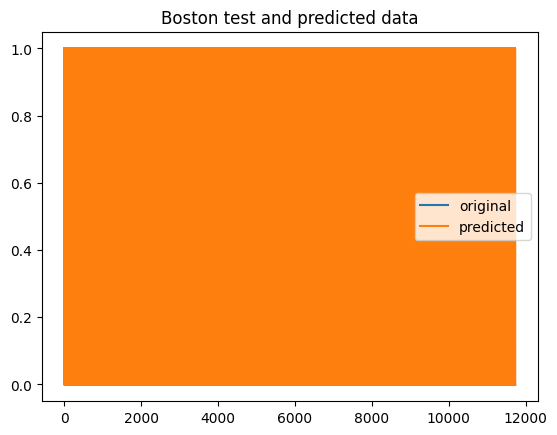

In [28]:
score = xgb.score(X_train, y_train)  
print("Training score: ", score)

#We can also apply the cross-validation method to evaluate the training score.

scores = cross_val_score(xgb, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())
#Mean cross-validataion score: 0.87 

## Or if you want to use the KFlold method in cross-validation it goes as below.

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgb, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
#K-fold CV average score: 0.87

# Both methods show that the model is around 87 %  accurate on average.

# Next, we can predict test data, then check the prediction accuracy. Here, we'll use MSE and RMSE as accuracy metrics.

ypred = xgb.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)
#MSE: 3.35
print("RMSE: %.2f" % (mse**(1/2.0)))
#RMSE: 1.83 

## Finally, we'll visualize the original and predicted test data in a plot to compare visually.

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

## selected features are

In [30]:
## selected_features
x_sel=sdata[['qty_slash_url', 'qty_at_url', 'qty_tld_url', 'length_url',
       'qty_dot_domain', 'qty_hyphen_domain', 'qty_vowels_domain',
       'domain_length', 'qty_hyphen_directory', 'qty_equal_directory',
       'qty_exclamation_directory', 'directory_length', 'qty_dot_file',
       'file_length', 'params_length', 'time_response', 'domain_spf', 'asn_ip',
       'time_domain_activation', 'qty_ip_resolved', 'qty_nameservers',
       'qty_mx_servers', 'ttl_hostname', 'tls_ssl_certificate',
       'url_shortened']]
       
y_sel=sdata['phishing']

In [31]:

X_sel_train, X_sel_test, y_sel_train, y_sel_test = train_test_split(X, y, test_size = 0.2, random_state = 121)
X_sel_train.shape, y_sel_train.shape, X_sel_test.shape, y_sel_test.shape

((46916, 111), (46916,), (11729, 111), (11729,))

In [32]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
xgb_sel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# fit the model 
xgb_sel.fit(X_sel_train,y_sel_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy=None, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=0, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, ...)

In [34]:
#predicting the target value from the model for the samples
y_sel_train_xgb = xgb.predict(X_train)
y_sel_test_xgb = xgb.predict(X_test)

In [35]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_xgb = metrics.accuracy_score(y_sel_train,y_sel_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_sel_test,y_sel_test_xgb)
print("XGBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_sel_train,y_sel_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_sel_test,y_sel_test_xgb)
print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_sel_train,y_sel_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_sel_test,y_sel_test_xgb)
print("XGBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_train_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_sel_train,y_sel_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_sel_test,y_sel_test_xgb)
print("XGBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : precision on test Data: {:.3f}".format(precision_score_train_xgb))

XGBoost Classifier : Accuracy on training Data: 0.976
XGBoost Classifier : Accuracy on test Data: 0.956

XGBoost Classifier : f1_score on training Data: 0.977
XGBoost Classifier : f1_score on test Data: 0.958

XGBoost Classifier : Recall on training Data: 0.976
XGBoost Classifier : Recall on test Data: 0.976

XGBoost Classifier : precision on training Data: 0.978
XGBoost Classifier : precision on test Data: 0.978
